In [1]:
#!pip install fredapi

In [2]:
import fredapi
import qrbook_funcs as qf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Problem 2

In [3]:
# FRED codes for US Treasury constant maturity rates
seriesnames = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', 'DGS7', 'DGS10', 'DGS20', 'DGS30']
maturities = qf.TenorsFromNames(seriesnames)

dates, prices = qf.GetFREDMatrix(seriesnames, startdate='2018-01-02', enddate='2018-12-31')
# remove no-data periods
nobs, t = len(dates), 0
while t < nobs:
    if all(np.isnan(prices[t])):
        del prices[t]
        del dates[t]
        nobs -= 1
    else:
        t += 1

In [4]:
nobs

249

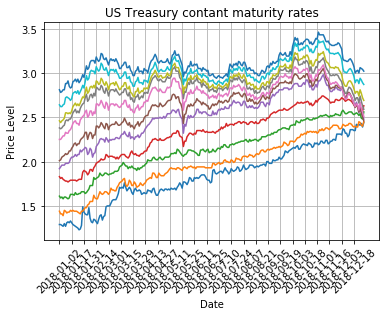

In [5]:
# plot the graph
x=np.arange(len(dates))
plt.plot(x,prices)
plt.title('US Treasury contant maturity rates')
plt.xlabel('Date')
plt.ylabel('Price Level')
plt.xticks(x[::10],dates[::10],rotation=45)
plt.grid(True)
plt.show();

In [6]:
type(dates[0])

str

In [7]:
dates[-1]

'2018-12-31'

In [8]:
rate = pd.DataFrame(prices, index = dates, columns = seriesnames)

In [9]:
rate_data=rate.to_excel("C://Users//wangc//Documents//Backup T580 first//New York University//Mathematics in Finance//Risk//Week 4//rate_date.xlsx")
rate.head()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
2018-01-02,1.29,1.44,1.61,1.83,1.92,2.01,2.25,2.38,2.46,2.64,2.81
2018-01-03,1.29,1.41,1.59,1.81,1.94,2.02,2.25,2.37,2.44,2.62,2.78
2018-01-04,1.28,1.41,1.60,1.82,1.96,2.05,2.27,2.38,2.46,2.62,2.79
2018-01-05,1.27,1.39,1.58,1.80,1.96,2.06,2.29,2.40,2.47,2.64,2.81
2018-01-08,1.30,1.45,1.60,1.79,1.96,2.07,2.29,2.41,2.49,2.65,2.81


In [10]:
rate_diff=rate.diff()
rate_diff.head()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.00,-0.03,-0.02,-0.02,0.02,0.01,0.00,-0.01,-0.02,-0.02,-0.03
2018-01-04,-0.01,0.00,0.01,0.01,0.02,0.03,0.02,0.01,0.02,0.00,0.01
2018-01-05,-0.01,-0.02,-0.02,-0.02,0.00,0.01,0.02,0.02,0.01,0.02,0.02
2018-01-08,0.03,0.06,0.02,-0.01,0.00,0.01,0.00,0.01,0.02,0.01,0.00


In [11]:
covariance=rate_diff.cov()

In [12]:
covariance

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DGS1MO,0.000955,0.000226,0.000107,0.000105,0.000042,0.000043,0.000026,0.000024,0.000030,0.000020,0.000007
DGS3MO,0.000226,0.000373,0.000165,0.000085,0.000049,0.000044,0.000043,0.000041,0.000039,0.000025,0.000024
DGS6MO,0.000107,0.000165,0.000318,0.000141,0.000167,0.000158,0.000157,0.000161,0.000138,0.000093,0.000080
DGS1,0.000105,0.000085,0.000141,0.000348,0.000339,0.000369,0.000384,0.000374,0.000339,0.000298,0.000260
DGS2,0.000042,0.000049,0.000167,0.000339,0.000878,0.000830,0.000866,0.000856,0.000775,0.000674,0.000582
DGS3,0.000043,0.000044,0.000158,0.000369,0.000830,0.000994,0.001026,0.001037,0.000955,0.000852,0.000756
DGS5,0.000026,0.000043,0.000157,0.000384,0.000866,0.001026,0.001193,0.001208,0.001129,0.001043,0.000937
DGS7,0.000024,0.000041,0.000161,0.000374,0.000856,0.001037,0.001208,0.001308,0.001226,0.001164,0.001065
DGS10,0.000030,0.000039,0.000138,0.000339,0.000775,0.000955,0.001129,0.001226,0.001214,0.001168,0.001084
DGS20,0.000020,0.000025,0.000093,0.000298,0.000674,0.000852,0.001043,0.001164,0.001168,0.001221,0.001147


In [13]:
covariance
covariance_excel=covariance.to_excel("C://Users//wangc//Documents//Backup T580 first//New York University//Mathematics in Finance//Risk//Week 4//covariance.xlsx")

In [14]:
(eig_vals, eig_vecs)=np.linalg.eig(covariance)

In [15]:
len(eig_vecs)

11

In [16]:
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.01489479  0.87385275  0.30560701 -0.36467858 -0.02908919  0.09277776
  -0.0023281   0.00260462 -0.01533166  0.00801453  0.00283133]
 [ 0.01774417  0.34451999 -0.02576804  0.65498104  0.52183188 -0.42245869
   0.00531679  0.00943308  0.01892762  0.00825301 -0.00186901]
 [ 0.05471416  0.22366011 -0.21395016  0.56080546 -0.29376357  0.69957708
  -0.00833237 -0.06844549 -0.05336645 -0.04654887 -0.03508512]
 [ 0.13041493  0.17266973 -0.24130982  0.13610005 -0.74776165 -0.54565641
   0.0845607   0.09198987  0.055652    0.02271221  0.01759002]
 [ 0.2897941   0.09707406 -0.50522524 -0.18051755  0.13954241  0.01097663
  -0.74286523  0.21406474  0.00857494  0.03122599  0.02105363]
 [ 0.3440332   0.05981383 -0.34678613 -0.16739692  0.11743142 -0.03844971
   0.20800005 -0.79885141  0.15828615 -0.03058023 -0.0842339 ]
 [ 0.39564972  0.00847993 -0.18057704 -0.10059084  0.12307441  0.00375903
   0.3804569   0.25208393 -0.7007291  -0.28495611  0.07061407]
 [ 0.42074105 -0.02400911 -

In [17]:
# first eigenvector
eig_vecs[:,0]

array([0.01489479, 0.01774417, 0.05471416, 0.13041493, 0.2897941 ,
       0.3440332 , 0.39564972, 0.42074105, 0.40401216, 0.38900628,
       0.35917781])

In [18]:
eig_vals

array([7.18462165e-03, 1.09507460e-03, 6.94438429e-04, 3.85177798e-04,
       1.79248775e-04, 1.48200359e-04, 1.24380399e-04, 5.67927658e-05,
       3.16987531e-05, 2.39338874e-05, 1.97458855e-05])

In [19]:
# Compute the percentage of the trace from the first 3 PCs.
pct_trace=sum(eig_vals[0:3])/sum(eig_vals)
pct_trace

0.9025296103123882

In [41]:
eig_vals

array([7.18462165e-03, 1.09507460e-03, 6.94438429e-04, 3.85177798e-04,
       1.79248775e-04, 1.48200359e-04, 1.24380399e-04, 5.67927658e-05,
       3.16987531e-05, 2.39338874e-05, 1.97458855e-05])

In [20]:
# Checking purpose P*D*inv(P)=A to make sure it's back to the covariance matrix
D=np.diag(eig_vals)
pd.DataFrame(np.matmul(np.matmul(eig_vecs,D),np.linalg.inv(eig_vecs)))

,0,1,2,3,4,5,6,7,8,9,10
0,0.000955,0.000226,0.000107,0.000105,0.000042,0.000043,0.000026,0.000024,0.000030,0.000020,0.000007
1,0.000226,0.000373,0.000165,0.000085,0.000049,0.000044,0.000043,0.000041,0.000039,0.000025,0.000024
2,0.000107,0.000165,0.000318,0.000141,0.000167,0.000158,0.000157,0.000161,0.000138,0.000093,0.000080
3,0.000105,0.000085,0.000141,0.000348,0.000339,0.000369,0.000384,0.000374,0.000339,0.000298,0.000260
4,0.000042,0.000049,0.000167,0.000339,0.000878,0.000830,0.000866,0.000856,0.000775,0.000674,0.000582
5,0.000043,0.000044,0.000158,0.000369,0.000830,0.000994,0.001026,0.001037,0.000955,0.000852,0.000756
6,0.000026,0.000043,0.000157,0.000384,0.000866,0.001026,0.001193,0.001208,0.001129,0.001043,0.000937
7,0.000024,0.000041,0.000161,0.000374,0.000856,0.001037,0.001208,0.001308,0.001226,0.001164,0.001065
8,0.000030,0.000039,0.000138,0.000339,0.000775,0.000955,0.001129,0.001226,0.001214,0.001168,0.001084
9,0.000020,0.000025,0.000093,0.000298,0.000674,0.000852,0.001043,0.001164,0.001168,0.001221,0.001147


In [21]:
PCA = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
seriesnames = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', 'DGS7', 'DGS10', 'DGS20', 'DGS30']
eigen_vectors=pd.DataFrame(eig_vecs, index=seriesnames, columns=PCA)

In [22]:
eigen_vectors

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
DGS1MO,0.014895,0.873853,0.305607,-0.364679,-0.029089,0.092778,-0.002328,0.002605,-0.015332,0.008015,0.002831
DGS3MO,0.017744,0.344520,-0.025768,0.654981,0.521832,-0.422459,0.005317,0.009433,0.018928,0.008253,-0.001869
DGS6MO,0.054714,0.223660,-0.213950,0.560805,-0.293764,0.699577,-0.008332,-0.068445,-0.053366,-0.046549,-0.035085
DGS1,0.130415,0.172670,-0.241310,0.136100,-0.747762,-0.545656,0.084561,0.091990,0.055652,0.022712,0.017590
DGS2,0.289794,0.097074,-0.505225,-0.180518,0.139542,0.010977,-0.742865,0.214065,0.008575,0.031226,0.021054
DGS3,0.344033,0.059814,-0.346786,-0.167397,0.117431,-0.038450,0.208000,-0.798851,0.158286,-0.030580,-0.084234
DGS5,0.395650,0.008480,-0.180577,-0.100591,0.123074,0.003759,0.380457,0.252084,-0.700729,-0.284956,0.070614
DGS7,0.420741,-0.024009,-0.007567,-0.020555,0.090077,0.114005,0.306957,0.318163,0.229278,0.704567,-0.237438
DGS10,0.404012,-0.043355,0.148889,0.030712,0.035071,0.082922,0.112167,0.186335,0.526791,-0.364314,0.588339
DGS20,0.389006,-0.094601,0.382502,0.088679,-0.072109,-0.037853,-0.184021,0.026932,0.101476,-0.408776,-0.683327


In [23]:
top_3_PCA=eigen_vectors[['PC1','PC2','PC3']]

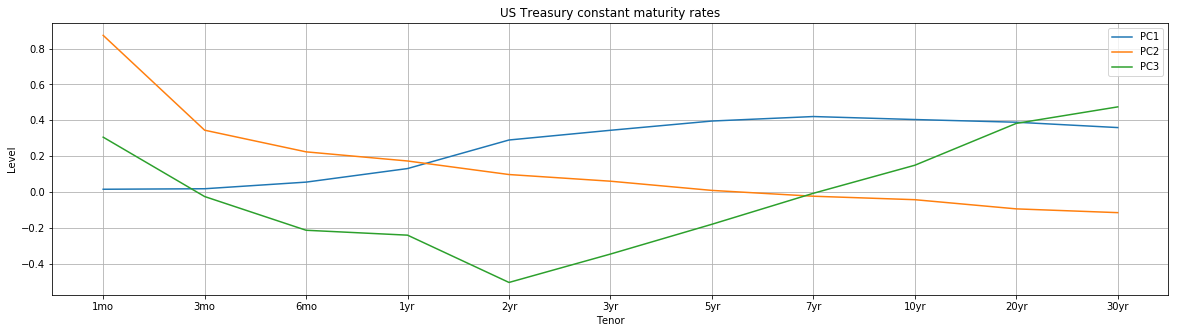

In [24]:
#Plot first 3 principal components 
plt.figure(figsize=(20,5))
tenornames=['1mo','3mo','6mo','1yr','2yr','3yr', '5yr','7yr','10yr','20yr','30yr']
tenornumbers=range(len(tenornames))
pc1=eigen_vectors['PC1']
pc2=eigen_vectors['PC2']
pc3=eigen_vectors['PC3']

plt.plot(tenornumbers, pc1, label='PC1')
plt.plot(tenornumbers, pc2, label='PC2')
plt.plot(tenornumbers, pc3, label='PC3')

## Configure the graph
plt.title('US Treasury constant maturity rates')
plt.xlabel('Tenor')
plt.ylabel('Level')
plt.legend()
plt.xticks(tenornumbers, tenornames)
plt.grid(True)
plt.show;

Question: Do they look like the Frye eigenvectors shown in the lecture? Why or why not?

Answer: The graph above doesn't look like the Frye eigenvectors shown in the lecture. 

The US treasury data used in the analysis is differet. Frey's time period is between 1989 to 1995, which covers a recession period from July 1990–Mar 1991 lasting 8 months.If we see the treasury rate between 1989 and 1995, it's going down with a high level of steepness. So the PC2-steepness is the dominant explaning factor in Frye's graph. The time period in problem 3 is for the rate of the 12 months in 2018 and the economy is strong, so steepness is not the dominant factor in our case. Instead, the Fed had 4 rate hikes in 2018, and thus the curvature or twist is the most important factor in our case. So this is the main difference between my graph in Problem 3 and Frye's graph in the lecture.


## Problem 3

In [25]:
# This is the tenors in year
x_tenors_year=qf.TenorsFromNames(seriesnames)

In [26]:
x_tenors_year

[0.08333333333333333, 0.25, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0, 20.0, 30.0]

In [27]:
# This is the observed treasury rate at 2018-12-31
y_rate=prices[-1]

In [28]:
y_rate

[2.44, 2.45, 2.56, 2.63, 2.48, 2.46, 2.51, 2.59, 2.69, 2.87, 3.02]

In [29]:
# Checking the length of rate and tenors. Should be both 11.
len(y_rate), len(x_tenors_year)

(11, 11)

In [30]:
# Use the linear interpolation function from the "qrbook_funcs" It outputs three result.
# new_rate is the linear interpolation result
new_tenor, new_rate, shortrates=qf.InterpolateCurve(x_tenors_year,y_rate)

In [31]:
# convert the tenor unit from year to months
tenor_month=[]
for each in new_tenor:
    tenor=each * 12
    tenor_month.append(tenor)

In [32]:
# checking new tenor in month and new rate
#tenor_month
#new_rate

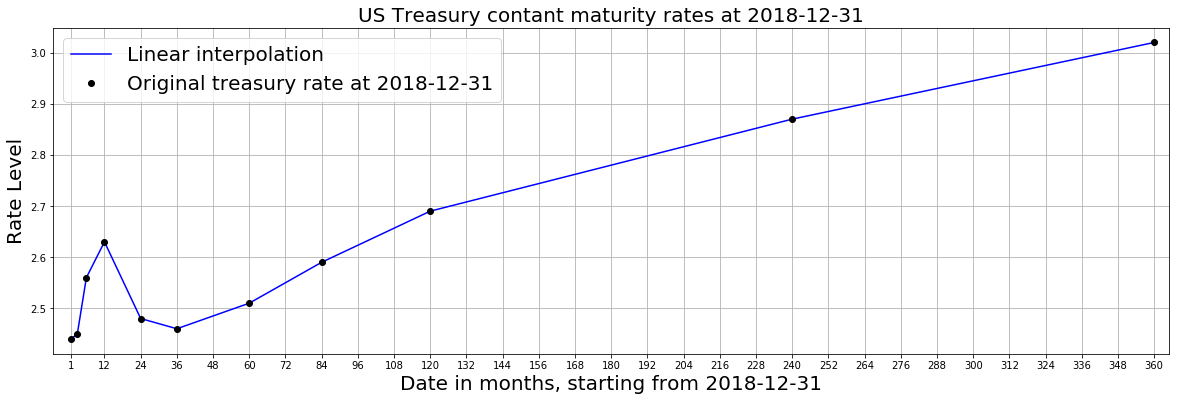

In [33]:
#Plot the curve

# xtick shows the 30 years point.
xtick=[1,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240,252,264,276,288,300,312,324,336,348,360]
# Original treasury tenor point at 2018-12-31
y_rate_tenor=[1,3,6,12,24,36,60,84,120,240,360]

plt.figure(figsize=(20,6)) # change size of figure

# Plot both curve and the original 11 rates.
plt.plot(tenor_month, new_rate, color='blue', label='Linear interpolation')
plt.plot(y_rate_tenor, y_rate, 'o', color='black',label='Original treasury rate at 2018-12-31')

plt.title('US Treasury contant maturity rates at 2018-12-31', size=20)
plt.xlabel('Date in months, starting from 2018-12-31', size=20)
plt.ylabel('Rate Level', size=20)
plt.xticks(xtick,rotation=0)
plt.xlim(-5,max(tenor_month)+5)
plt.legend(loc=0,prop={'size':20})
plt.grid(True)
plt.show();

In [34]:
# compute nelson estimate
def nelson(b0,b1,b2,tau,time):
    res=b0+b1*tau/time*(1-math.exp(time/tau*(-1)))+b2*tau/time*(1-math.exp(time/tau*(-1))*(1+time/tau))
    return res

In [35]:
# compute the nelson estimate for the entire time span
def nelson_list(x):
    b0=x[0]
    b1=x[1]
    b2=x[2]
    tau=x[3]
    estimate_rate=[]
    for i in range(1,361):
        est_rate=nelson(b0,b1,b2,tau,i)
        estimate_rate.append(est_rate)
        
    # output a list
    return estimate_rate

In [36]:
# mad function to output the sum of absolute deviation between the linear curve and the Nelson curve
def mad(x):
    b0=x[0]
    b1=x[1]
    b2=x[2]
    tau=x[3]
    
    # used to cumulate the absolute deviation
    sum_mad=0
    
    # This is the tenors in year
    x_tenors_year=qf.TenorsFromNames(seriesnames)
    # this is the observed treasury rate at 2018-12-31
    y_rate=prices[-1]
    # linear interpolation
    new_tenor, new_rate, shortrates=qf.InterpolateCurve(x_tenors_year,y_rate) 
    
    # Compute all the estimated rate using formula
    estimate_rate=[]
    for i in range(1,361):
        est_rate=nelson(b0,b1,b2,tau,i)
        estimate_rate.append(est_rate)
    
    for i in range(360):
        abs_diff=abs(estimate_rate[i]-new_rate[i])
        sum_mad=sum_mad+abs_diff
    return sum_mad/360

In [37]:
from scipy.optimize import minimize
x0 = np.array([0.01,0.01,0.01,1]) # initialize the 4 parameters
res = minimize(mad, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True, 'maxiter': 1000})

Optimization terminated successfully.
         Current function value: 0.014623
         Iterations: 446
         Function evaluations: 757


In [38]:
res

 final_simplex: (array([[  3.63633494,  -1.22816818,  -0.3003841 , 181.23645819],
       [  3.63633494,  -1.22816818,  -0.30038409, 181.23645818],
       [  3.63633494,  -1.22816818,  -0.30038409, 181.23645818],
       [  3.63633494,  -1.22816818,  -0.3003841 , 181.23645819],
       [  3.63633494,  -1.22816818,  -0.3003841 , 181.23645819]]), array([0.01462251, 0.01462251, 0.01462251, 0.01462251, 0.01462251]))
           fun: 0.014622506828311342
       message: 'Optimization terminated successfully.'
          nfev: 757
           nit: 446
        status: 0
       success: True
             x: array([  3.63633494,  -1.22816818,  -0.3003841 , 181.23645819])

In [39]:
# Use the optimized parameter to compute all the estimated Nelson rate
nelson_x=res.x
nelson_rate=nelson_list(nelson_x)

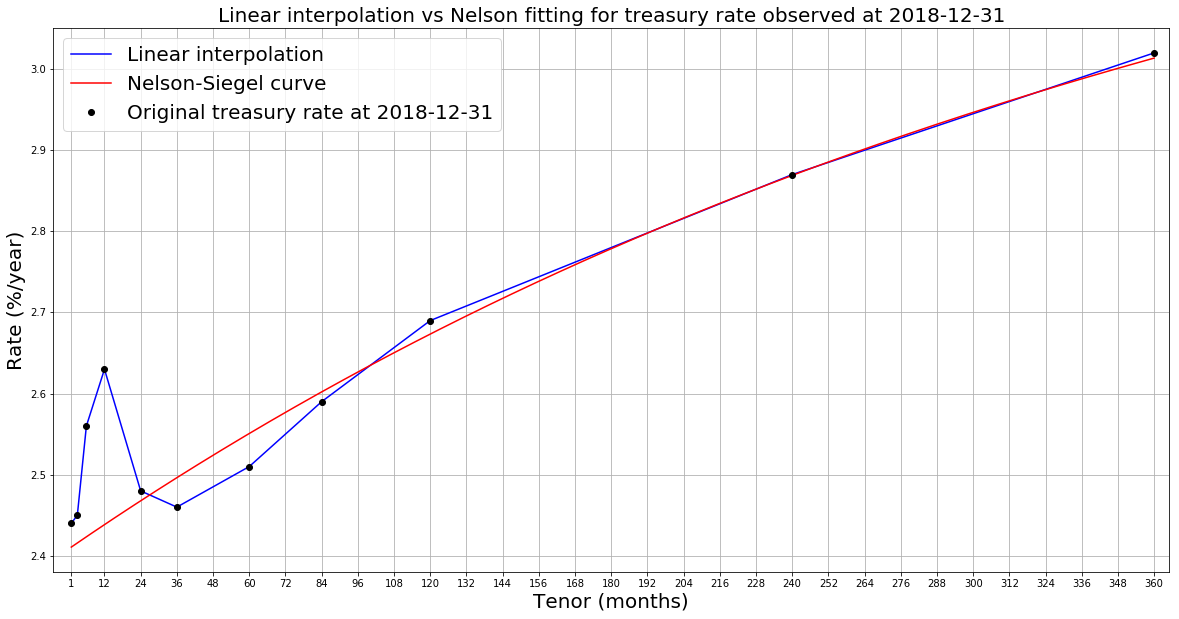

In [40]:
#Plot original rate, linear interpolation and nelson rate
plt.figure(figsize=(20,10)) # change size of figure
xtick=[1,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240,252,264,276,288,300,312,324,336,348,360]
y_rate_tenor=[1,3,6,12,24,36,60,84,120,240,360]


plt.plot(tenor_month, new_rate, color='blue',label='Linear interpolation')
plt.plot(tenor_month, nelson_rate, color='red', label='Nelson-Siegel curve')
plt.plot(y_rate_tenor, y_rate, 'o', color='black', label='Original treasury rate at 2018-12-31')

## Configure the graph
plt.title('Linear interpolation vs Nelson fitting for treasury rate observed at 2018-12-31', size=20)
plt.xlabel('Tenor (months)', size=20)
plt.ylabel('Rate (%/year)', size=20)
plt.xticks(xtick,rotation=0)
plt.xlim(-5,max(tenor_month)+5)
plt.legend(loc=0,prop={'size':20})
plt.grid(True)
plt.show;

Question: What does the Nelson-Siegel curve imply about the perpetual interest rate, i.e. the rate paid on infinite maturity bonds?

Answer: Based on the graph above, we see that Nelson-Siegel is a rather smoothing curve fitted to the Linear interpolation curve. And it appears that Nelson_Siegel curve is increasing as the maturity increases along the horizontal axis. However, the rate of increase seems to decay as maturity goes to infinity. It's likely that it may become flat for an infinite maturity.